In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bionetgen
import roadrunner

# Load model from BNGL
infile="mapk3_inh.bngl"
model = bionetgen.bngmodel(infile) 
sim = model.setup_simulator() # sim is a libroadrunner simulator object

## Run a single simulation and plot the results

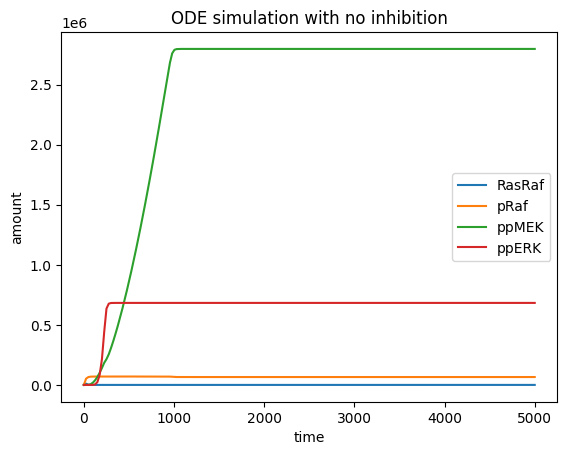

In [20]:
# Simulate using RoadRunner defaults (ODEs)
onames= [ o for o in model.observables]
sel = ['Time'] + onames
sim['kin_inh_factor']=1.0
sim.reset()
res1= sim.simulate(0,5000,200,selections=sel)

# Plot observables
for o in onames:
    plt.plot(res1['time'],res1[o],label=o)
plt.title("ODE simulation with no inhibition")
plt.xlabel('time')
plt.ylabel('amount')
_= plt.legend()

## Compare results of multiple simulations

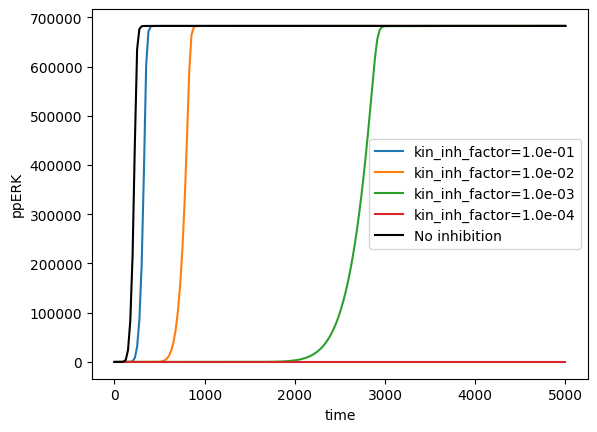

In [19]:
pname='kin_inh_factor'
out=[]
krange=np.logspace(-1,-4,4)
for k in krange: 
    sim[pname]=k
    sim.reset() 
    res2= sim.simulate(0,5000,200,selections=sel)
    o= 'ppERK'
    out.append(res2[o][-1])
    plt.plot(res2['time'],res2[o],label=f'{pname}={k:0.1e}')
plt.plot(res1['time'],res1[o],'k', label='No inhibition')
plt.xlabel('time')
plt.ylabel(o)
_=plt.legend(loc='best')



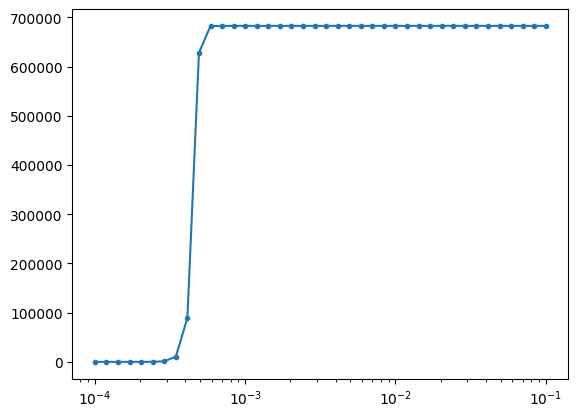

In [18]:
plt.semilogx(krange,out,'.-')